<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/Get_DIBL_SS_FromAtlasLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# @title Thesis Work Python Code for Decoding the ATLAS TCAD output files
# @markdown ---
# @markdown Input parameters for the code

F1_FILENAME = "FinFET_v8B_Lg14W5H5Wf5Nd5_19Tox1.5_BOUSARI_vd1.00.log" # @param {type:"string"}
F2_FILENAME = "FinFET_v8B_Lg14W5H5Wf5Nd5_19Tox1.5_BOUSARI_vd0.05.log" # @param {type:"string"}

# @markdown ---

In [11]:
from pathlib import Path

def GetAtlasFileNames(F1_FILENAME, F2_FILENAME):

    from google.colab import files


    my_file = Path(f"/content/{F1_FILENAME}")
    if my_file.is_file():
        f1 = F1_FILENAME
        print (f"F1: {F1_FILENAME} is present")
    else:
        files.upload_file(F1_FILENAME)
        f1 = F1_FILENAME
        print (f"F1: Loading {F1_FILENAME}...Done")

    my_file = Path(f"/content/{F2_FILENAME}")
    if my_file.is_file():
        f2 = F1_FILENAME
        print (f"F2: {F2_FILENAME} is present")
    else:
        files.upload_file(F1_FILENAME)
        f2 = F2_FILENAME
        print (f"F2: Loading {F2_FILENAME}...Done")

    return(f1, f2)

f1, f2 = GetAtlasFileNames(F1_FILENAME, F2_FILENAME)

F1: FinFET_v8B_Lg14W5H5Wf5Nd5_19Tox1.5_BOUSARI_vd1.00.log is present
F2: FinFET_v8B_Lg14W5H5Wf5Nd5_19Tox1.5_BOUSARI_vd0.05.log is present


In [12]:
!pip install matplotlib
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style


In [13]:
def load_data(filename):

    Id = []
    Vg = []
    with open(filename, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith('d'):
                values = line.split()
                first_column_value = float(values[1]) # read voltage
                last_column_value = float(values[-1]) # read current
                Id.append(last_column_value)
                Vg.append(first_column_value)

    return Vg, Id


In [14]:
def plot_norm_IdVg(Vg, Id):
    #style.use('ggplot')
    plt.title('Id-Vgs')
    plt.ylabel('Id')
    plt.xlabel('Vgs')
    plt.plot(Vg, Id, color='g')

    plt.grid(True,color='k')

def plot_log_IdVg(Vg, Id):
    #style.use('ggplot')
    plt.title('Id-Vgs')
    plt.ylabel('Id')
    plt.xlabel('Vgs')
    plt.plot(Vg, np.log10(Id),color='m')
    plt.grid(True,color='k')

def generate_double_plot(Vg, Id):
    plt.title(f1)
    plt.subplot(211)
    plot_norm_IdVg(Vg, Id)
    plt.subplot(212)
    plot_log_IdVg(Vg, Id)
    plt.show()

def generate_merged_plot(Vg1, Id1, Vg2, Id2):

    plt.plot(Vg1, np.log10(Id1), "r", Vg2, np.log10(Id2), "b")
    plt.grid(True,color='k')
    plt.title('log(Id)-Vgs')
    plt.ylabel('log(Id)')
    plt.xlabel('Vgs')
    plt.legend()
    plt.show()


<ipython-input-14-8f6377aef728>:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


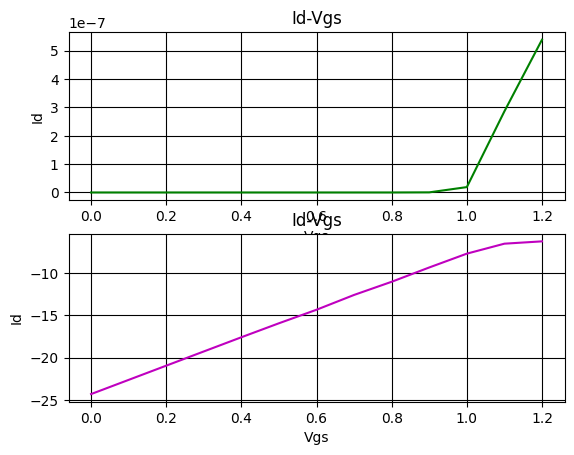

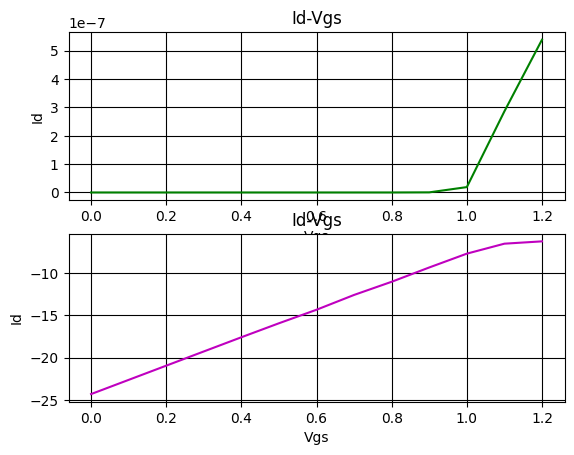

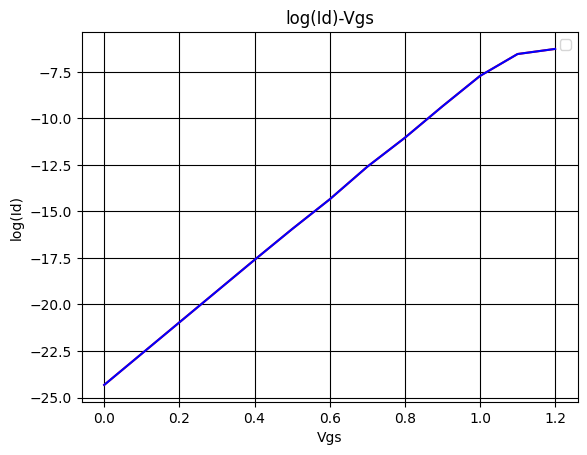

In [15]:
# BEST PERFORMANCE SO FAR
# f1 = "FinFET_v8B_Lg30W2H5Wf5Nd2_19Tox1_vd1.00.log"
# f2 = "FinFET_v8B_Lg30W2H5Wf5Nd2_19Tox1_vd0.05.log"

#f1 = "FinFET_v8B_Lg24W2H5Wf5Nd2_19Tox1Tgate5_vd1.00.log"
#f2 = "FinFET_v8B_Lg24W2H5Wf5Nd2_19Tox1Tgate5_vd0.05.log"

# BOUSARI PAPER DHGO FinFET
#f1 = "FinFET_v8B_Lg14W5H5Wf5Nd5_19Tox1.5_BOUSARI_vd1.00.log"
#f2 = "FinFET_v8B_Lg14W5H5Wf5Nd5_19Tox1.5_BOUSARI_vd0.05.log"



Vg12, Id12 =  load_data(f1)
Vg00, Id00 =  load_data(f2)

generate_double_plot(Vg00, Id00)
generate_double_plot(Vg12, Id12)
generate_merged_plot(Vg00, Id00, Vg12, Id12)


In [16]:
import numpy as np

# Load the data from the .log files
# You would need to implement the actual data loading
Vg_07, Id_07 = load_data(f1)
Vg_005, Id_005 = load_data(f2)


# Take the logarithm of the drain current
log_Id_005 = np.log10(Id_005)
log_Id_07 = np.log10(Id_07)

# Calculate the slope of the ID-VG curve in the subthreshold region
# You might need to adjust the indices depending on where the subthreshold region is in your data
SS_005 = np.round(np.diff(Vg_005[5:15]) / np.diff(log_Id_005[5:15]),4)
SS_07 = np.round(np.diff(Vg_07[5:15]) / np.diff(log_Id_07[5:15]),4)



# SS = (dV_GS / d(log10(I_D))) * (k * T / q),

# The subthreshold swing is the average slope in the subthreshold region
# SS_005 = np.round(np.mean(SS_005),4)
# SS_07 = np.round(np.mean(SS_07),4)
SS_07

array([0.0626, 0.0571, 0.0643, 0.0592, 0.0612, 0.0849, 0.3642])

In [17]:

# Find the threshold voltage for both drain voltages
# You might need to adjust the threshold current depending on your device

Vth005 = 0.35 #np.interp(1e-7, Vg00, Id00)
Vth120 = 0.37 # np.interp(1e-7, Vg12, Id12)

Vth005 = np.round(np.interp(-7, np.log10(Id00), Vg00 ),4)
Vth120 = np.round(np.interp(-7, np.log10(Id12), Vg12 ),4)

Id_00 = np.round(np.interp(0.05, Vg12, np.log10(Id12) ,4))
Id_th = np.round(np.interp(Vth120, Vg12, np.log10(Id12) ,4))


# The DIBL is the change in threshold voltage divided by the change in drain voltage
DIBL = np.round(1000* (np.abs(Vth120 - Vth005)) / (1.2 - 0.05),2)
#Please note that this Python code is an example and might not work perfectly for your specific case. The exact indices for the subthreshold region and the threshold current may need to be adjusted based on your device and simulation parameters. Also, the data loading part isn't implemented, you would need to handle it based on the format of your log files.
#print (f"Vth at Vds=0.05V is {Vth005} V")
print (f"Vth (at Vds = 1.2V) is {Vth120} V")

# Leakage current
leakage_current = Id12[np.argmin(np.abs(Vg12))]
max_current = Id12[np.argmax(np.abs(Vg12))]

Imax_Ileak = max_current / leakage_current

#print(f"SS_005 = {SS_005*1000} mV/dec")
print(f"SS is {SS_07*1000} mV/dec")
print (f"DIBL is {DIBL} mV/V")
print (f"Id_00 is {10**Id_00} A")
print (f"Id_th is {10**Id_th} A")

ION_IOFF = 10**Id_th / 10**Id_00

print (f"Ion/Ioff is {'%e' % ION_IOFF} ")

print (f"leakage_current is {leakage_current} A")
print (f"max_current is {max_current} A")
print (f"Imax/Ileakage is {'%e' % Imax_Ileak} ")



Vth (at Vds = 1.2V) is 1.0612 V
SS is [ 62.6  57.1  64.3  59.2  61.2  84.9 364.2] mV/dec
DIBL is 0.0 mV/V
Id_00 is 1e-23 A
Id_th is 1e-07 A
Ion/Ioff is 1.000000e+16 
leakage_current is 4.755506434e-25 A
max_current is 5.388919777e-07 A
Imax/Ileakage is 1.133196e+18 


In [18]:
# import re
# import numpy as np
# import matplotlib.pyplot as plt

# # Parse Atlas code to extract input values
# def extract_params_from_atlas_code(filename):
#     with open(filename, 'r') as file:
#         atlas_code = file.read()

#     # Input values
#     # gate_length = float(re.search(r'x\.m l=(\d\.\d{2})', atlas_code).group(1))
#     # gate_oxide_thickness = float(re.search(r'z\.m l=(-?\d\.\d{3})', atlas_code).group(1)) - float(re.search(r'z\.m l=(-?\d\.\d{3})', atlas_code).group(1))
#     # channel_thickness = float(re.search(r'y\.m l=(-?\d\.\d{3})', atlas_code).group(1)) - float(re.search(r'y\.m l=(-?\d\.\d{3})', atlas_code).group(1))
#     # work_function = float(re.search(r'contact name= gate workfun=(\d\.\d)', atlas_code).group(1))
#     # gate_dielectric_permittivity = float(re.search(r'region\s*num=2\s*material=(\w+)', atlas_code).group(1))
#     # doping_concentration = float(re.search(r'doping region=1 n.type uniform conc=(\d\.\dE\d{2})', atlas_code).group(1))

#     #return gate_length, gate_oxide_thickness, channel_thickness, work_function, gate_dielectric_permittivity, doping_concentration
#     return gate_length

# # Read IV curve data
# def read_iv_curve_data(filename):
#     data = np.loadtxt(filename, skiprows=1)
#     vgs = data[:, 0]
#     id = data[:, 1]
#     return vgs, id

# # Calculate output parameters
# def calculate_output_params(vgs, id, gate_length, gate_oxide_thickness, channel_thickness, gate_dielectric_permittivity):
#     # V_TH
#     vth_index = np.argmax(np.gradient(id))
#     v_th = vgs[vth_index]

#     # I_ON and I_OFF
#     i_on = np.max(id)
#     i_off = np.min(id)

#     # DIBL
#     vth_low_vds = np.argmax(np.gradient(id[:vth_index]))
#     vth_high_vds = np.argmax(np.gradient(id[vth_index:])) + vth_index
#     dibl = (vgs[vth_low_vds] - vgs[vth_high_vds]) / (vgs[vth_high_vds] - vgs[vth_low_vds])

#     # SS
#     log_id = np.log10(id)
#     ss = np.abs(np.gradient(log_id) / np.gradient(vgs))[vth_index]

#     # Gate capacitance
#     epsilon_0 = 8.854e-12  # F/m
#     gate_capacitance = gate_dielectric_permittivity * epsilon_0 * gate_length * channel_thickness / gate_oxide_thickness

#     # Leakage current
#     leakage_current = id[np.argmin(np.abs(vgs))]

#     return v_th, i_on, i_off, dibl, ss, gate_capacitance, leakage_current

# def calculate_ss(vgs, id):
#     # V_TH
#     vth_index = np.argmax(np.gradient(id))
#     v_th = vgs[vth_index]

#     # I_ON and I_OFF
#     i_on = np.max(id)
#     i_off = np.min(id)

#     # DIBL
#     # vth_low_vds = np.argmax(np.gradient(id[:vth_index]))
#     # vth_high_vds = np.argmax(np.gradient(id[vth_index:])) + vth_index
#     # dibl = (vgs[vth_low_vds] - vgs[vth_high_vds]) / (vgs[vth_high_vds] - vgs[vth_low_vds])

#     # SS
#     log_id = np.log10(id)
#     ss = np.abs(np.gradient(log_id) / np.gradient(vgs))[vth_index]

#     # Gate capacitance
#     # epsilon_0 = 8.854e-12  # F/m
#     # gate_capacitance = gate_dielectric_permittivity * epsilon_0 * gate_length * channel_thickness / gate_oxide_thickness

#     # # Leakage current
#     # leakage_current = id[np.argmin(np.abs(vgs))]

#     return ss, v_th, vth_index




In [19]:
# # Main
# atlas_code_file = 'FinFET_v8B_Lg14W2H5Wf5Nd2_19Tox1.in'
# iv_curve_file = 'FinFET_v8B_Lg30W2H5Wf5Nd2_19Tox1_vd1.00.log'

# # Extract input parameters from Atlas code
# #gate_length, gate_oxide_thickness, channel_thickness, work_function, gate_dielectric_permittivity, doping_concentration = extract_params_from_atlas_code(atlas_code_file)
# gate_length = extract_params_from_atlas_code(atlas_code_file)
# gate_length

# # Read IV curve data
# vgs, id = load_data(iv_curve_file)

# ss, v_th, vth_index = calculate_ss(vgs, id)
# # # Calculate output parameters
# # v_th, i_on, i_off, dibl, ss, gate_capacitance, leakage_current = calculate_output_params(vgs, id, gate_length, gate_oxide_thickness, channel_thickness, gate_dielectric_permittivity)

# # # Print results
# # print("Input parameters:")
# # print(f"Gate length: {gate_length} um")
# # print(f"Gate oxide thickness: {gate_oxide_thickness} um")
# # print(f"Channel thickness: {channel_thickness} um")
# # print(f"Work function of the gate: {work_function} eV")
# # print(f"Gate dielectric permittivity: {gate_dielectric_permittivity}")
# # print(f"Source/drain doping concentration: {doping_concentration} cm^-3")

# print("\nOutput parameters:")
# print(f"SS: {ss} V/dec")
# print(f"V_TH: {v_th} V")
# # print(f"I_ON: {i_on} A")
# # print(f"I_OFF: {i_off} A")
# # print(f"DIBL: {dibl} V/V")
# print(f"VTH_INDEX: {vth_index} ")

# # print(f"Gate capacitance: {gate_capacitance} F")
# # print(f"Leakage current: {leakage_current} A")


In [20]:
import numpy as np

def calculate_ion_ioff(ig_data, vgs_data, vgs_off):
    # Find the indices for Vgs ON and OFF
    vgs_on_index = np.argmax(vgs_data == vgs_off)
    vgs_off_index = np.argmax(vgs_data == 0)

    # Calculate ION and IOFF
    ion = np.mean(ig_data[vgs_on_index:vgs_off_index])
    ioff = np.mean(ig_data[vgs_off_index:])

    # Calculate ION/IOFF ratio
    ion_ioff_ratio = ion / ioff

    return ion_ioff_ratio


# Example usage

vgs_off = -1.0  # Vgs OFF threshold
ion_ioff_ratio = calculate_ion_ioff(Id_07, Vg_07, Vth120)
print(f"ION/IOFF ratio: {ion_ioff_ratio}")


ION/IOFF ratio: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
